In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

# Parte 1: Código

Trabajo conjunto con Maria Fernanda Carrillo - 20201596

## Encuentre las ecuaciones de Ingreso  y tasa de interés  de equilibrio (Escriba paso a paso la derivación de estas ecuaciones).

Agregar más detalles de los apuntes de clase!!

Copiar ecuaciones de equilibrio DA-OA??? tres variables endógeneas??
REVISAR ESTA PRIMERA PARTE!

- Demanda Agregada (DA): 

Está conformada por la Curva IS:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t)$

Y por la Ecuación LM:

$$  r = -\frac{1}{j}\frac{Mo^s}{P} + \frac{k}{j}Y $$

Eliminando “r” y despejando P, se obtiene:

$$  P = -\frac{h Mo^s}{-j B_o + (jB_1 + hk)Y} $$

O, en función del nivel de ingresos $(Y)$:

$$  Y = \frac{jB_o}{jB_1 + hk} + (\frac{hMo^s}{jB_1 + hk})\frac{1}{P} $$


Ahora bien, considernado la ecuación de equilibrio en el mercado monetario

$$ Mo^s - P = kY - jr $$

Se reemplaza $(r)$, y se obtiene la ecuación de la demanda agregada $(DA)$

$$  P = \frac{h Mo^s}{(-jB_0)+(jB_1 + hk)Y} $$

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$

- Oferta Agregada (OA): 

La curva de $OA$ de corto plazo se puede representar con la siguiente ecuación el nivel de precios (P), el precio esperado (P^e) y el producto potencial:

$$ P = P^e + θ(Y - \bar{Y}) $$ 




- Equilibrio entre la DA y OA: Modelo DA-OA

Considerando la ecuación de la demanda agregada $(DA)$:

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$

Y la ecuación de la oferta agregada $(OA)$:

$$ P = P^e + θ(Y - \bar{Y}) $$ 



- Para hallar $Y^e$ igualamos ambas ecuaciones:

$$ P^e + θ(Y - \bar{Y}) = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$


$$ Y^e = [\frac{1}{(θ + \frac{jB_1+hk}{h})}] * [\frac{(hM^s_o + jB_o}{h}-P^e+θ\bar{Y})]$$

Para hallar P^e, despejamos la ecuación de $OA$ en función de Y, es decir, reemplazamos Y^e en la ecuación de oferta agregada $0A$:

$$ P^{eq-da-oa}= P^e + θ(Y^{eq-da-oa} - \bar{Y}) $$ 

Y reemplazamos $Y$ en la ecuación de $DA$:

$$ P^{eq-da-oa} = P^e+θ([\frac{1}{(θ+\frac{jB_1+hk}{h})}] * [(\frac{hM^s_o + jB_o}{h}- P^e + θ\bar{Y})]- \bar{Y})$$

Para encontrar la tasa de interés de equilibrio $r^{eq-da-oa}$ reemplazamos $P^{eq-da-oa}$ en la ecuación de tasa de interés de equilibrio del modelo IS-LM.

La tasa de interés de equilibrio de modelo IS-LM:
$$r^{eq-is-lm}=\frac{kB_o}{kh+jB_1}-(\frac{B_1}{kh+jB_1})*(M^s_o-P)$$

Reemplazando, la tasa de interés de equilibrio en DA-OA es:

$$r^{eq-is-lm}=\frac{kB_o}{kh+jB_1}-(\frac{B_1}{kh+jB_1})*(M^s_o-P^{eq-da-oa})$$

$$r^{eq-da-oa}=\frac{kB_o}{kh+jB_1}-(\frac{B_1}{kh+jB_1})*(M^s_o-P^e+θ([\frac{1}{(θ+\frac{jB_1+hk}{h})}] * [(\frac{hM^s_o + jB_o}{h}- P^e + θ\bar{Y})]- \bar{Y}))$$

## Grafique el equilibrio simultáneo en el modelo DA-OA.

In [2]:
 # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [3]:

# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [P_AD[0], Y[0]] # DA, coordenada inicio
B = [P_AD[-1], Y[-1]] # DA, coordenada fin

C = [P_AS[0], Y[0]] # L_45, coordenada inicio
D = [P_AS[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(192.39043824701196, 50.79681274900399)

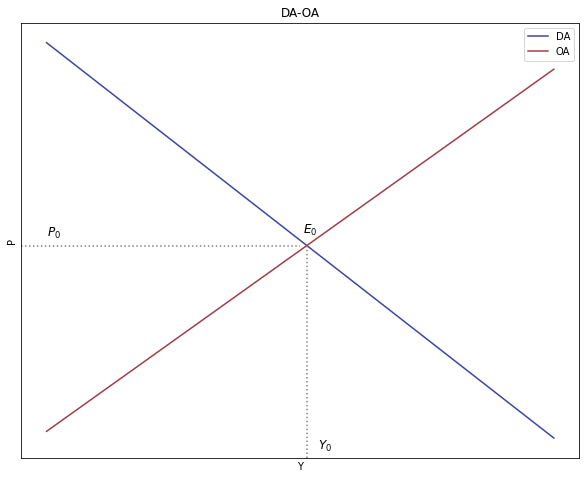

In [4]:
 # Gráfico del modelo DA-OA

# Dimensiones del gráfico
y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "#3d459e") #DA
ax.plot(Y, P_AS, label = "OA", color = "#9e3d45") #OA

# Líneas punteadas
plt.axhline(y=intersec[0], xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.axvline(x=intersec[1],  ymin= 0, ymax= 0.49, linestyle = ":", color = "grey")

# Texto agregado
plt.text(0, 200, '$P_0$', fontsize = 12, color = 'black')
plt.text(53, 25, '$Y_0$', fontsize = 12, color = 'black')
plt.text(50, 202, '$E_0$', fontsize = 12, color = 'black')


# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel='Y', ylabel='P')
ax.legend()

plt.show()

## Estática comparativa

### Analice los efectos sobre las variables endógenas P y r de una disminución del gasto fiscal. 

#### Intuitivo:

- Efecto en el Modelo IS-LM:

$$ Go↓ → DA↓ → DA < Y → Y↓$$

$$ Y↓ → M^d↓ → M^d < M^s → r↓$$

- Efecto en el Modelo OA-DA: 

$$ Y↓ → [P^e + θ(Y↓ -\bar{Y})] → [P^e + θ(Y -\bar{Y})↓] → P↓ $$


#### Matemáticamente: 

In [5]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [6]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [7]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto fiscal = ", df_Y_eq_Go)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interés con respecto al diferencial del gasto fiscal = ", df_r_eq_Go)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_P_eq_Go = diff(P_eq, Go)
print("El Diferencial del nivel de precios con respecto al diferencial del gasto fiscal = ", df_P_eq_Go)

El Diferencial del Producto con respecto al diferencial del gasto fiscal =  j/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))


El Diferencial de la tasa de interés con respecto al diferencial del gasto fiscal =  -j*θ/((θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)*(h*k + j*(-(1 - t)*(b - m) + 1))) + j/(h*k + j*(-(1 - t)*(b - m) + 1))


El Diferencial del nivel de precios con respecto al diferencial del gasto fiscal =  j*θ/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h))


Efecto en el ingreso: 

$$ \frac{∆Y^e}{∆G_o} = \frac{-j}{|A|} < 0 $$

$$ \frac{∆Y^e}{∆G_o} = (+) $$

$$ \frac{∆Y^e}{(-)} = (+) $$

$$ ∆Y^e = (-) < 0 $$

Efecto en la tasa de interés: 

$$ \frac{∆r^e}{∆G_o} = -\frac{-\frac{K + θM^s_0}{P^2_0}} {|A|} < 0 $$

$$ \frac{∆r^e}{∆G_o} = (+) $$

$$ \frac{∆r^e}{(-)} = (+) < 0 $$

$$ ∆r^e = (-) < 0 $$

Efecto en el nivel de precios:Pe?

$$ \frac{∆P^e}{∆G_o} = \frac{-0j}{|A|} < 0 $$

$$ \frac{∆P^e}{∆G_o} = (+) $$

$$ \frac{∆P^e}{(-)} = (+) $$

$$ ∆P^e = (-) < 0 $$

#### Gráfico:

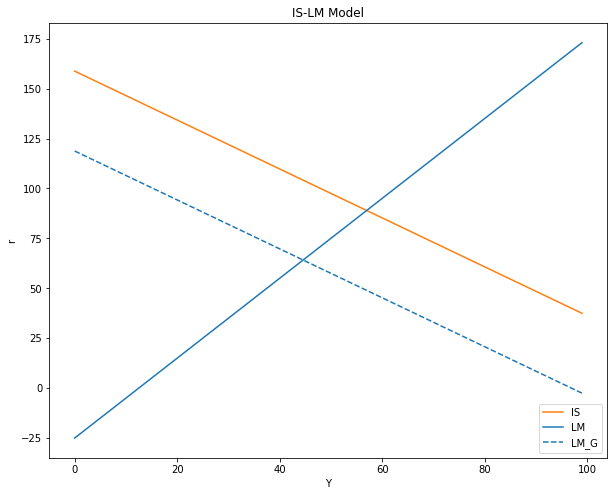

In [8]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva IS: disminución del gasto fiscal (Go)

# Definir SOLO el parámetro cambiado
Go = 40

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_Go = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))
# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS
ax.plot(Y, i, label="LM", color = "C0")  #LM
ax.plot(Y, r-Go, label="LM_G", color = "C0", linestyle ='dashed')  #LM_G

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()



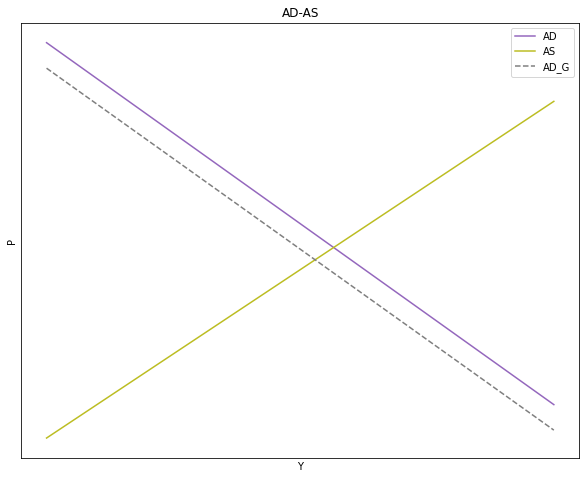

In [9]:
#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)


#--------------------------------------------------
    # NUEVA Oferta Agregada

# Definir SOLO el parámetro cambiado

Go = 32

# Generar la ecuación con el nuevo parámetro

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD_Go(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Go = P_AD_Go(h, Ms, j, B0, B1, k, Y)

    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax.plot(Y, P_Go, label = "AD_G", color = "C7", linestyle = 'dashed') #AD_G

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="AD-AS", xlabel= 'Y', ylabel= 'P')
ax.legend()

plt.show()

In [10]:
# líneas punteadas autómaticas

# definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [r_Go[0], Y[0]] # DA, coordenada inicio
B = [r_Go[-1], Y[-1]] # DA, coordenada fin

C = [P_Go[0], Y[0]] # L_45, coordenada inicio
D = [P_Go[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(29.875000000000025, 95.0)

<function matplotlib.pyplot.show(close=None, block=None)>

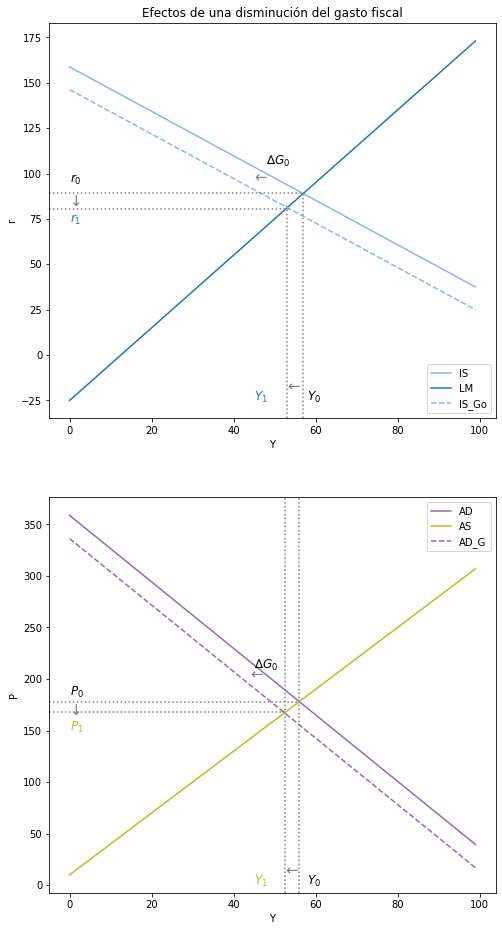

In [11]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#88b7ef") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, r_Go, label="IS_Go", color = "#88b7ef", linestyle ='dashed')  #IS

ax1.axvline(x=53,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
ax1.axvline(x=57,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
ax1.axhline(y=80.5,  xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")
ax1.axhline(y=89,  xmin= 0, xmax= 0.57, linestyle = ":", color = "grey")

ax1.text(48, 105, '∆$G_0$', fontsize=12, color='black')
ax1.text(45, 95, '←', fontsize=15, color='grey')
ax1.text(53, -20, '←', fontsize=15, color='grey')
ax1.text(0, 82, '↓', fontsize=15, color='grey')
ax1.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax1.text(45, -25, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 73, '$r_1$', fontsize=12, color='C0')
ax1.text(0, 95, '$r_0$', fontsize=12, color='black')


ax1.set(title="Efectos de una disminución del gasto fiscal", xlabel='Y', ylabel='r')
ax1.legend()


#---------------------------------
    # Gráfico 2:

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax2.plot(Y, P_Go, label = "AD_G", color = "C4", linestyle = 'dashed') #AD_G

ax2.axvline(x=52.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=168.3,  xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")
ax2.axhline(y=178,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(45, 210, '∆$G_0$', fontsize=12, color='black')
ax2.text(52.5, 10, '←', fontsize=15, color='grey')
ax2.text(44, 200, '←', fontsize=15, color='grey')
ax2.text(0, 165, '↓', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(45, 0, '$Y_1$', fontsize=12, color='C8')
ax2.text(0, 150, '$P_1$', fontsize=12, color='C8')
ax2.text(0, 184, '$P_0$', fontsize=12, color='black')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show

### Analice los efectos sobre las variables endógenas P y r de una disminución de la masa monetaria (∆Ms0 < 0). 

#### Intuitivo:

- Efecto en el Modelo IS-LM:

$$ M^s_0↓ → M^s↓ → M^s < M^d → r↑$$

$$ r↑ → I↓ → DA↓ → DA < Y → Y↓$$

- Efecto en el Modelo OA-DA:

$$ Y↓ → [P^e + θ(Y↓ -\bar{Y})] → [P^e + θ(Y -\bar{Y})↓] → P↓ → P^e↓ $$

#### Matemáticamente: 

In [12]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [13]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del Producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_P_eq_Ms = diff(P_eq, Ms)
print("El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria = ", df_P_eq_Ms)

El Diferencial del Producto con respecto al diferencial de la masa monetaria =  1/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


El Diferencial de la tasa de interés con respecto al diferencial de la masa monetaria =  h*(-θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h) + 1)/(h*k + j*(-(1 - t)*(b - m) + 1))


El Diferencial del nivel de precios con respecto al diferencial de la masa monetaria =  θ/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)


- Cambio en el diferencial del Producto: revisar

$$ \frac{∆Ye}{∆M^s} = (+) $$

$$ \frac{∆Ye}{(-)} = (+) $$

$$ ∆Ye = (-) < 0 $$

 - Cambio en el diferencial de la tasa de interés: revisar
 
$$ \frac{∆r^e}{∆M^s} = (-) $$

$$ \frac{∆r^e}{(-)} = (-) $$

$$ ∆r^e = (+) < 0 $$

- Cambio en el nivel de precios:

$$ \frac{∆Pe}{∆M^s} = (+) $$

$$ \frac{∆Pe}{(-)} = (+) $$

$$ ∆Pe = (-) < 0 $$

#### Gráfico: 

In [14]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = -110

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

In [15]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Ms = 125

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [16]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [r[0], Y[0]] # DA, coordenada inicio
B = [r[-1], Y[-1]] # DA, coordenada fin

C = [i[0], Y[0]] # L_45, coordenada inicio
D = [i_Ms[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(96.5077508553872, 50.809999301724744)

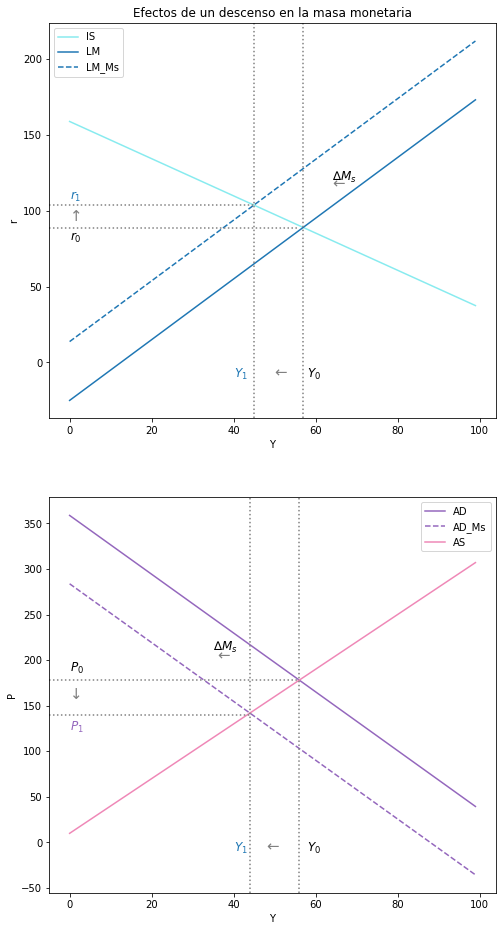

In [17]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#88ebef") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "C0", linestyle ='dashed')  #LM

ax1.axvline(x=45,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=57,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=88.9,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
ax1.axhline(y=104,  xmin= 0, xmax= 0.46, linestyle = ":", color = "grey")

ax1.text(64, 120, '∆$M_s$', fontsize=12, color='black')
ax1.text(64, 115, '←', fontsize=15, color='grey')
ax1.text(50, -10, '←', fontsize=15, color='grey')
ax1.text(0, 93, '↑', fontsize=15, color='grey')
ax1.text(40, -10, '$Y_1$', fontsize=12, color='C0')
ax1.text(58, -10, '$Y_0$', fontsize=12, color='black')
ax1.text(0, 107, '$r_1$', fontsize=12, color='C0')
ax1.text(0, 80, '$r_0$', fontsize=12, color='black')


ax1.set(title="Efectos de un descenso en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_Ms, label = "AD_Ms", color = "C4", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "#ef88b7") #OA

ax2.axvline(x=44,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=140,  xmin= 0, xmax= 0.45, linestyle = ":", color = "grey")
ax2.axhline(y=178,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(48, -10, '←', fontsize=15, color='grey')
ax2.text(36, 200, '←', fontsize=15, color='grey')
ax2.text(35, 210, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 158, '↓', fontsize=15, color='grey')

ax2.text(40, -10, '$Y_1$', fontsize=12, color='C0')
ax2.text(58, -10, '$Y_0$', fontsize=12, color='black')
ax2.text(0, 123, '$P_1$', fontsize=12, color='C4')
ax2.text(0, 187, '$P_0$', fontsize=12, color='black')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show()

### Analice los efectos sobre las variables endógenas P y r de un incremento de la tasa de impuestos (∆t >0).

#### Intuitivo: 

- Efecto en el Modelo IS-LM:

$$ t↑ → C↓ → DA↓ → DA < Y → Y↓$$

$$ Y↓ → M^d↓  → M^d < M^s → r↓$$

- Efecto en el Modelo OA-DA:

$$ Y↓ → [P^e + θ(Y↓ -\bar{Y})] → P↓ → P^e↓ $$

#### Matemáticamente: 

In [18]:
# nombrar variables como símbolos de IS
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos de LM 
k, j, Ms, P, Y = symbols('k j Ms P Y')

# nombrar variables como símbolos para curva de oferta agregada
Pe, _Y, Y, θ = symbols('Pe, _Y, Y, θ')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio en el modelo DA-OA
Y_eq = ( (1)/(θ + ( (j*beta_1+h*k)/h) ) )*( ( (h*Ms+j*beta_0)/h ) - Pe + θ*_Y )

# Precio de equilibrio en el modelo DA-OA 
P_eq = Pe + θ*(Y_eq - _Y)

# Tasa de interés de equilibrio en el modelo DA-OA
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms - P_eq)
#((h*Ms+j*beta_0)/h) - ((j*beta_1+h*r)/h)*((P-Pe-θ*_Y)/θ)

In [19]:
# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del Producto con respecto al diferencial de la tasa de impuestos = ", df_Y_eq_t)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interés con respecto al diferencial de la tasa de impuestos = ", df_r_eq_t)
print("\n")

# Efecto del cambio de Precio esperado sobre Tasa de Interés en el modelo DA-OA
df_P_eq_t = diff(P_eq, t)
print("El Diferencial del nivel de precios con respecto al diferencial de la tasa de impuestos = ", df_P_eq_t)

El Diferencial del Producto con respecto al diferencial de la tasa de impuestos =  -j*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)


El Diferencial de la tasa de interés con respecto al diferencial de la tasa de impuestos =  -h*j*(b - m)*(Ms - Pe - θ*(-_Y + (-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)))/(h*k + j*(-(1 - t)*(b - m) + 1))**2 - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2 + j*θ*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/((θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2*(h*k + j*(-(1 - t)*(b - m) + 1)))


El Diferencial del nivel de precios con respecto al diferencial de la tasa de impuestos =  -j*θ*(b - m)*(-Pe + _Y*θ + (Ms*h + j*(Co + Go + Io + Xo))/h)/(h*(θ + (h*k + j*(-(1 - t)*(b - m) + 1))/h)**2)


- Cambio del diferencial del producto: 

$$ \frac{∆Y^e}{∆t} = (-) $$

$$ \frac{∆Y^e}{(+)} = (-) $$

$$ ∆Y^e = (-) < 0 $$

- Cambio del diferencial de la tasa de interés:

$$ \frac{∆r^e}{∆t} = (-) $$

$$ \frac{∆r^e}{(+)} = (-) $$

$$ ∆r^e = (-) < 0 $$

- Cambio del diferencial del nivel de precios:

$$ \frac{∆P^e}{∆t} = (-) $$

$$ \frac{∆P^e}{(+)} = (-) $$

$$ ∆P^e = (-) < 0 $$

#### Gráfico

In [20]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.03

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva IS: incremento en la tasa de impuestos (t)

# Definir SOLO el parámetro cambiado
t = 0.8

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_t = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

In [21]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.03

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

t = 0.9

# Generar la ecuación con el nuevo parámetro

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD_t(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_t = P_AD_t(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

In [22]:
# líneas punteadas autómaticas

    # definir la función line_intersection
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

    # coordenadas de las curvas (x,y)
A = [r[0], Y[0]] # DA, coordenada inicio
B = [r[-1], Y[-1]] # DA, coordenada fin

C = [i[0], Y[0]] # L_45, coordenada inicio
D = [i_Ms[-1], Y[-1]] # L_45, coordenada fin

    # creación de intersección

intersec = line_intersection((A, B), (C, D))
intersec # (y,x)

(99.83007349433458, 52.199270436912876)

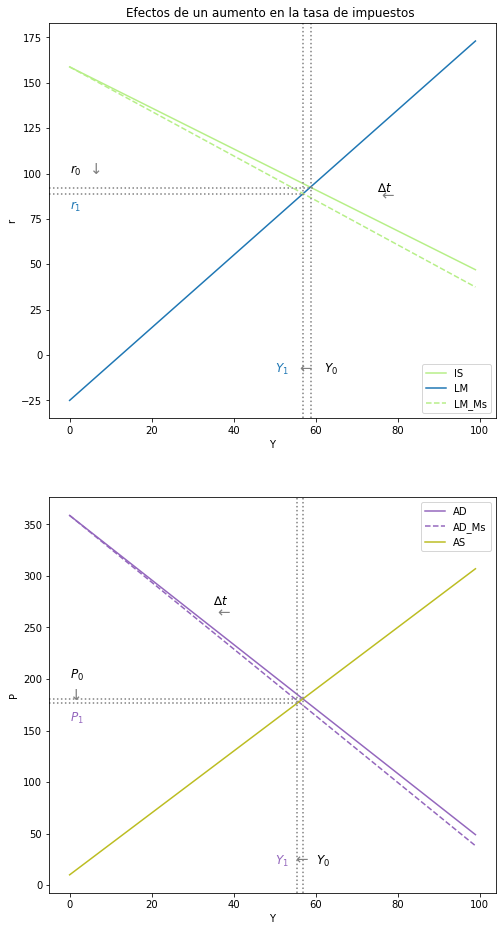

In [23]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "#b7ef88") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, r_t, label="LM_Ms", color = "#b7ef88", linestyle ='dashed')  #LM

ax1.axvline(x=57,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=59,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=88.9,  xmin= 0, xmax= 0.57, linestyle = ":", color = "grey")
ax1.axhline(y=92,  xmin= 0, xmax= 0.59, linestyle = ":", color = "grey")

ax1.text(75, 90, '∆$t$', fontsize=12, color='black')
ax1.text(76, 85, '←', fontsize=15, color='grey')
ax1.text(56, -10, '←', fontsize=15, color='grey')
ax1.text(5, 100, '↓', fontsize=15, color='grey')
ax1.text(50, -10, '$Y_1$', fontsize=12, color='C0')
ax1.text(62, -10, '$Y_0$', fontsize=12, color='black')
ax1.text(0, 100, '$r_0$', fontsize=12, color='black')
ax1.text(0, 80, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en la tasa de impuestos ", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_t, label = "AD_Ms", color = "C4", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA

ax2.axvline(x=55.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=57,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=177,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")
ax2.axhline(y=181,  xmin= 0, xmax= 0.57, linestyle = ":", color = "grey")

ax2.text(55, 20, '←', fontsize=15, color='grey')
ax2.text(36, 260, '←', fontsize=15, color='grey')
ax2.text(35, 272, '∆$t$', fontsize=12, color='black')
ax2.text(0, 180, '↓', fontsize=15, color='grey')

ax2.text(50, 20, '$Y_1$', fontsize=12, color='C4')
ax2.text(60, 20, '$Y_0$', fontsize=12, color='black')
ax2.text(0, 200, '$P_0$', fontsize=12, color='black')
ax2.text(0, 159, '$P_1$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show()

# Parte 2: Reporte

La pregunta de investigación del artículo es: ¿Qué nos dicen las políticas monetarias peruanas implementadas por el banco central en los años 2002-2013 sobre la estabilidad macroeconómica en contextos favorables y desfavorables? Respecto a ello, Dancourt se enfoca en analizar el impacto de los principales instrumentos de la política monetaria durante esos años: el canal de crédito, el canal de tipo de cambio y la intervención esterilizada en el mercado de divisas. Asimismo, también analiza el proceso de desdolarización. Con este análisis se busca comparar como a diferencia del pasado, con estas nuevas políticas se ha logrado una mayor estabilidad macroeconómica, así como poniéndole especial énfasis al importante rol de BCR.

Una fortaleza del artículo es su análisis a partir de la regla de Taylor y el modelo de Bernanke-Blinder. La regla de Taylor, de acuerdo a Dancourt, nos permite comprender como estabilizar la inflación y es la lógica que implementó el Banco Central durante el período 2004-2014 para tomar decisiones respecto a la tasa de interés de referencia y así reducir las brechas de inflación y producción. Asimismo, con el modelo de Bernanke-Blinder podemos entender mejor como el banco central fijó la tasa de interés de corto plazo en lugar de fijar la cantidad de dinero, de esta manera entendemos que la tasa de interés referencial afecta tanto la actividad económica, el costo de endeudamiento en el sistema bancario y el mercado de bonos. Considero que otra fortaleza es como toma en cuenta lo fluctuante que es la economía peruana frente a shocks y contextos externos, y toma aquello en consideración cuando analiza el espacio y tiempo de la investigación ya que fue una época especialmente favorable. Pero al mismo tiempo también analiza la época de crisis 2008-2009 lo cuál nos permite comparar mejor los cambios y efectos de las políticas monetarias implementadas por el BCR. 

Aun así, considero que una debilidad del artículo es la incapacidad de probar que el modelo monetario actual peruano sea eficaz y viable a largo plazo. El mismo autor señala que ha funcionado bien a corto plazo o cuando las políticas fueron aplicadas por un período limitado de tiempo durante contextos desfavorables; sin embargo, debido al poco transcurso de tiempo que ha pasado desde su implementación todavía es muy temprano para dar por sentado de que sea la mejor vía a largo plazo.  Centrándonos específicamente en el tipo de cambio se podría criticar que sería mejor implementar o desarrollar un modelo que incluya tanto variables de tipo de cambio a corto plazo, así como a largo plazo para dar mayor estabilidad, así como tener un mayor control sobre la intervención y acumulación de divisas. 

Otra fortaleza, es el enfoque en el canal del tipo de cambio y la intervención esterilizada en el mercado cambiario y como mediante estos canales se logra combatir a shocks externos que afectan tanto nuestra demanda como oferta. A través de estos canales el Banco Central logró la estabilidad de precios y mayor empleo, pero siempre y cuando tenga suficientes reservas de divisas. Un aporte importante que sale de este análisis es sobre uno de los elementos que hace que la economía peruana sea una de las más especiales en el mundo: su política de regla de intervención que va contracorriente a lo que los demás países hacen en su mayoría, es decir, aplicamos un tipo de cambio flotante sucio. De acuerdo a Dancourt, en lugar de comprar dólares cuando el precio baja y venderlos cuando tenemos suficientes reservas, el BCR hace todo lo contrario: compra dólares cuando su precio sube y, además, vende dólares si no tiene suficientes reservas. Desde la crisis del 2008, esta política nos ha permitido mantener la estabilidad financiera del sistema bancario dolarizado y contrarrestar la inflación de nuestra moneda.

Continuando con el enfoque de esta política de flotación sucia, Waldo Mendoza comentó a BBC que gracias a este tipo de cambio el Perú tiene una de las monedas menos volátiles en América Latina (2022). De acuerdo a él y otros expertos, es una de las explicaciones claves para entender la estabilidad monetaria del país. Desde otra perspectiva, Dancourt también resalta el valor que tuvo la reserva de divisas y Chuctaya (2019) apoya esta mirada, en tanto menciona que, efectivamente es esta una medida importante al momento de afrontar posibles shocks o crisis económicas externas y del cómo es que favorecen al equilibrio en tanto garantiza un “colchón” para situaciones imprevistas. Ello no obstante resaltando cómo es que esta medida no ha sido tratada adecuadamente, principalmente por un excedente existente, sujeto a un costo de oportunidad. Pero a pesar de ello, es que destaca que estas disposiciones, han dado resultados beneficiosos sobremanera, pues es que Perú es considerada una de las economías con mayor estabilidad a nivel latinoamericano; sin embargo, con un potencial de crecimiento latente. 

Fuentes: 

https://repositorio.utp.edu.pe/bitstream/handle/20.500.12867/5155/A.Chuctaya_E.Roman_Trabajo_de_Suficiencia_Profesional_Bachiller_2019.pdf?sequence=1&isAllowed=y

BBC News Mundo. (2022, 24 junio). Qué es la «flotación sucia», el sistema con el que Perú mantiene estable su moneda (y cómo actúa ahora frente la inflación). Recuperado 2 de octubre de 2022, de https://www.bbc.com/mundo/noticias-america-latina-61889723